In [23]:
from PIL import Image
import numpy as np

In [24]:
img = Image.open('data/giraffe.jpg')
img = img.resize((320, 320))

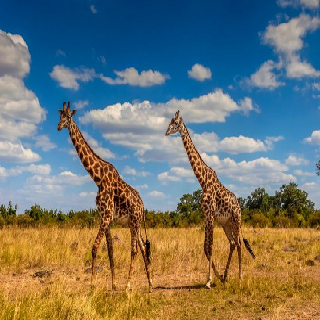

In [25]:
img

In [26]:
arr = np.array(img).astype(np.float32()).reshape(1, 320, 320, 3)

In [28]:
arr = arr / 127.5 - 1

In [30]:
np.savetxt('data/matrix.txt', arr.reshape(-1))

In [ ]:
np.no

In [8]:
import tflite_runtime.interpreter as tflite

In [9]:
interpreter = tflite.Interpreter(model_path='data/ssdlite_object_detection.tflite')
interpreter.allocate_tensors()

In [10]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [11]:
input_details

[{'name': 'normalized_input_image_tensor',
  'index': 301,
  'shape': array([  1, 320, 320,   3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)}]

In [12]:
output_details

[{'name': 'raw_outputs/box_encodings',
  'index': 302,
  'shape': array([   1, 2034,    4], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)},
 {'name': 'raw_outputs/class_predictions',
  'index': 303,
  'shape': array([   1, 2034,   91], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)}]

In [14]:
input_shape = input_details[0]['shape']
interpreter.set_tensor(input_details[0]['index'], arr)

interpreter.invoke()

output_data0 = interpreter.get_tensor(output_details[0]['index'])
output_data1 = interpreter.get_tensor(output_details[1]['index'])


In [32]:
output_data0

TypeError: 'numpy.ndarray' object is not callable

In [22]:
output_data1

array([[[-6.0987186, -3.238491 , -4.9855714, ..., -5.228451 ,
         -5.5066175, -4.8956146],
        [-6.0831833, -4.360899 , -5.9543943, ..., -5.569113 ,
         -5.95777  , -6.2515583],
        [-6.083544 , -3.858574 , -5.6083126, ..., -5.0434036,
         -5.792454 , -5.9444046],
        ...,
        [-4.415294 , -3.904927 , -4.43018  , ..., -4.3669333,
         -4.4236445, -4.3195276],
        [-4.415355 , -4.036259 , -4.4025593, ..., -4.319834 ,
         -4.4104805, -4.273018 ],
        [-4.415231 , -3.2212389, -4.4601336, ..., -4.7645144,
         -4.754294 , -4.503692 ]]], dtype=float32)